Importing Data Set

In [1]:
from keras.datasets import cifar10

Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import tensorflow as tf
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [31]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [32]:
y_test.shape

(10000, 1)

50000 - training images 

10000 - testing images

(32,32,3) - image structure :(width,height,RGB)

In [8]:
y_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('images and their labels: ' + str([x[0] for x in y_train[0:10]])) 
print('classes for the labels: ' + str([y_classes[x[0]] for x in y_train[0:10]]))

images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


In [9]:
y_train = y_train.reshape(-1,)

In [37]:
def show_img(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[y[index]])

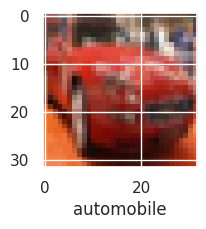

In [11]:
show_img(x_train,y_train,5)

Pre Processing

One - hot encoding

from label indices to one-hot encoded vectors

In [33]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

(32,32,3) ---> 3072  (i.e 32*32*3)

x_train = np.reshape(x_train,(50000,3072))

x_test = np.reshape(x_test,(10000,3072))

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Normalisation

In [14]:
x_train /= 255
x_test /= 255

Model Building

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation = 'relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(5,5),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=34, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [16]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [17]:
model.fit(x_train ,y_train ,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.7489 - accuracy: 0.3508 - val_loss: 1.4156 - val_accuracy: 0.4786
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.3997 - accuracy: 0.4978 - val_loss: 1.1818 - val_accuracy: 0.5771
Epoch 3/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.2418 - accuracy: 0.5632 - val_loss: 1.0746 - val_accuracy: 0.6188
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.1415 - accuracy: 0.6072 - val_loss: 1.0230 - val_accuracy: 0.6476
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 1.0620 - accuracy: 0.6365 - val_loss: 0.9808 - val_accuracy: 0.6607
Epoch 6/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9998 - accuracy: 0.6601 - val_loss: 0.9826 - val_accuracy: 0.6678
Epoch 7/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.9545 - accuracy: 0.6785 - val_loss: 0.9518 -

Prediction

In [18]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [19]:
y_pred[9]

array([0.01495696, 0.51109457, 0.00606793, 0.00668928, 0.00230474,
       0.00155699, 0.0128404 , 0.00161354, 0.0112905 , 0.43158516],
      dtype=float32)

In [20]:
y_pred = [np.argmax(arr) for arr in y_pred]

In [21]:
y_pred

[3,
 8,
 8,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 4,
 9,
 5,
 7,
 9,
 8,
 5,
 5,
 8,
 6,
 7,
 2,
 4,
 9,
 4,
 3,
 4,
 0,
 9,
 6,
 6,
 2,
 4,
 3,
 9,
 3,
 4,
 1,
 9,
 5,
 0,
 6,
 7,
 6,
 0,
 9,
 3,
 7,
 7,
 6,
 0,
 8,
 4,
 6,
 0,
 8,
 4,
 3,
 4,
 3,
 7,
 5,
 6,
 2,
 6,
 2,
 1,
 0,
 5,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 2,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 5,
 7,
 2,
 8,
 8,
 9,
 0,
 4,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 5,
 6,
 3,
 1,
 1,
 2,
 6,
 3,
 5,
 4,
 0,
 2,
 2,
 9,
 3,
 0,
 4,
 6,
 7,
 8,
 5,
 1,
 2,
 8,
 2,
 0,
 3,
 3,
 3,
 4,
 1,
 8,
 9,
 4,
 2,
 9,
 7,
 4,
 8,
 6,
 5,
 6,
 5,
 8,
 7,
 3,
 5,
 7,
 5,
 0,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 3,
 6,
 0,
 7,
 8,
 4,
 3,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 7,
 4,
 5,
 9,
 0,
 5,
 2,
 2,
 4,
 8,
 6,
 3,
 3,
 8,
 5,
 7,
 4,
 1,
 7,
 4,
 8,
 8,
 7,
 8,
 5,
 1,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 6,
 8,
 5,
 7,
 6,
 0,
 4,
 9,
 5,
 4,
 7,
 5,
 9,
 7,
 7,
 9,
 4,
 4,
 3,
 6,
 5,
 1,
 5,
 8,
 8,
 0,
 4,
 4,
 3,
 6,
 1,
 9,
 8,
 5,
 0,
 3,
 1,
 8,
 2,
 0,


In [26]:
y_pred[3]

0

In [ ]:
show_img(x_test,y_test,3)

In [38]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 179.0353 - accuracy: 0.4858


[179.03529357910156, 0.48579999804496765]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
cn = confusion_matrix(y_pred,y_test)
cn